## Observations and Insights 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
complete_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = complete_df[complete_df.duplicated(['Mouse ID', 'Timepoint'])]

duplicate_mouse.head(1)["Mouse ID"]

909    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate = complete_df.loc[complete_df['Mouse ID']=='g989']
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [2]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = complete_df.drop_duplicates(['Mouse ID', 'Timepoint'])
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

249

## Summary Statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_mean = cleaned_df.groupby("Drug Regimen").mean()
mean_df = pd.DataFrame(grouped_mean)

grouped_median = cleaned_df.groupby("Drug Regimen").median()
median_df = pd.DataFrame(grouped_median)

grouped_var = cleaned_df.groupby("Drug Regimen").var()
var_df = pd.DataFrame(grouped_var)

grouped_std = cleaned_df.groupby("Drug Regimen").std()
std_df = pd.DataFrame(grouped_std)

grouped_sem = cleaned_df.groupby("Drug Regimen").sem()
sem_df = pd.DataFrame(grouped_sem)

In [5]:
summary_df = pd.DataFrame({"Mean" : mean_df["Tumor Volume (mm3)"],
                      "Median" : median_df["Tumor Volume (mm3)"],
                      "Variance" : var_df["Tumor Volume (mm3)"],
                      "Standard deviation" : std_df["Tumor Volume (mm3)"],
                      "SEM" : sem_df["Tumor Volume (mm3)"]})
summary_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grouped_mean = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"])
mean_df = pd.DataFrame(grouped_mean)
mean_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

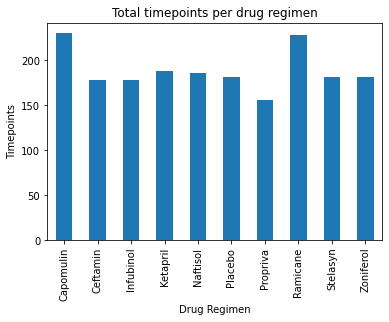

In [51]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_grouped = cleaned_df.groupby("Drug Regimen").count()
drug_regimen_df = pd.DataFrame(drug_grouped)

bar_chart_df = drug_regimen_df["Timepoint"]

bar_chart_df.plot(kind="bar", title="Total timepoints per drug regimen", ylabel="Timepoints")
plt.show()

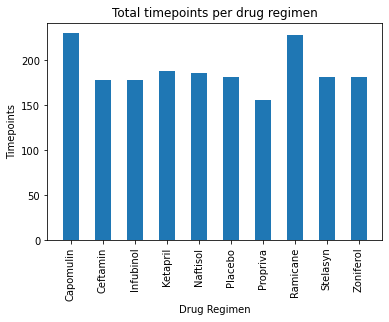

In [52]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

summary_index = drug_regimen_df.reset_index(drop=False)
plt.bar(summary_index["Drug Regimen"], height = drug_regimen_df["Timepoint"], width = 0.5)
plt.xticks(rotation=90)
plt.title("Total timepoints per drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()

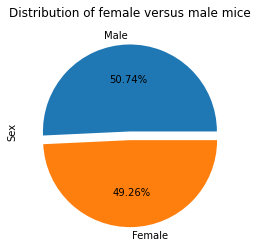

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts_sex = cleaned_df["Sex"].value_counts()
counts_sex.plot(kind= "pie", autopct= "%1.2f%%", explode=(0,0.1), title=("Distribution of female versus male mice"))
plt.show()

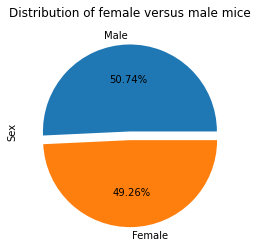

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
plt.pie(counts_sex, labels = labels, autopct="%1.2f%%", explode=(0,0.1))
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoints_df = pd.DataFrame(cleaned_df.groupby('Mouse ID')['Timepoint'].max())
timepoints_df = timepoints_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = timepoints_df.merge(cleaned_df, how='inner', on=('Mouse ID','Timepoint'))
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [12]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Capomulin=[]
Ramicane=[]
Infubinol=[]
Ceftamin=[]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in merged_df.iterrows():
        if row["Drug Regimen"] == treatments[0]:
            Capomulin.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == treatments[1]:
            Ramicane.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == treatments[2]:
            Infubinol.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == treatments[3]:
            Ceftamin.append(row["Tumor Volume (mm3)"])
    
    # add subset
drugs_volumes = pd.DataFrame({"Capomulin": Capomulin, "Ramicane": Ramicane, "Infubinol": Infubinol, 
                        "Ceftamin": Ceftamin})

#Displaying the table containing tumor volumes for the drug regimens of interest
drugs_volumes

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [13]:
# Determine outliers using upper and lower bounds
def find_outliers_IQR(drugs_volumes):

   q1=drugs_volumes.quantile(0.25)

   q3=drugs_volumes.quantile(0.75)

   IQR=q3-q1

   outliers = drugs_volumes[((drugs_volumes<(q1-1.5*IQR)) | (drugs_volumes>(q3+1.5*IQR)))]
    
   return outliers

outliers = find_outliers_IQR(drugs_volumes[["Capomulin","Ramicane","Infubinol","Ceftamin"]])
outliers=outliers.dropna(how='all')
outliers

,Capomulin,Ramicane,Infubinol,Ceftamin
5,NaN,NaN,36.321346,NaN


In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
data = [drugs_volumes["Capomulin"],
        drugs_volumes["Ramicane"],
        drugs_volumes["Infubinol"],
        drugs_volumes["Ceftamin"]]

lowerq_data=[]
midq_data=[]
upperq_data=[]
iqr_data=[]
lower_bound_data=[]
upper_bound_data=[]

for drug in data:
    quartiles = drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    midq = quartiles[0.5]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    lowerq_data.append(lowerq)
    midq_data.append(midq)
    upperq_data.append(upperq)
    iqr_data.append(iqr)
    lower_bound_data.append(lower_bound)
    upper_bound_data.append(upper_bound)

In [15]:
index_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]

quartiles_iqr_data = pd.DataFrame({"Lower Quartile": lowerq_data, "Median":midq_data, "Upper Quartile": upperq_data, 
                        "IQR": iqr_data, "Lower Bound":lower_bound_data, "Upper Bound":upper_bound_data,}, index=index_list)
quartiles_iqr_data

,Lower Quartile,Median,Upper Quartile,IQR,Lower Bound,Upper Bound
Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015
Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811
Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458


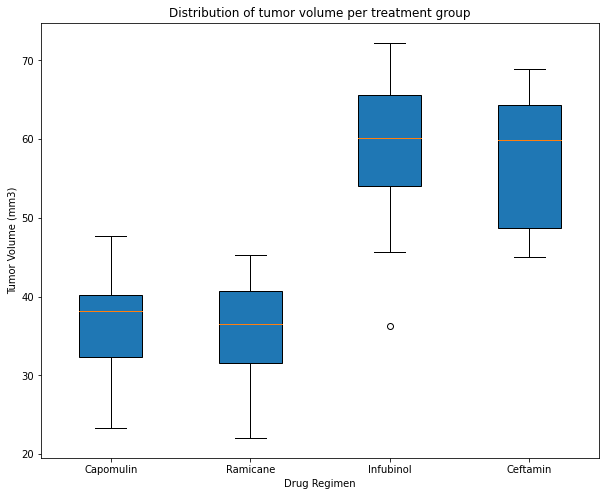

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [drugs_volumes["Capomulin"],
        drugs_volumes["Ramicane"],
        drugs_volumes["Infubinol"],
        drugs_volumes["Ceftamin"]]

fig1,bxplot = plt.subplots (figsize=(10, 8))
bxplot.boxplot(data, labels=treatments, patch_artist=True)
bxplot.set_title('Distribution of tumor volume per treatment group')
bxplot.set_ylabel('Tumor Volume (mm3)')
bxplot.set_xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

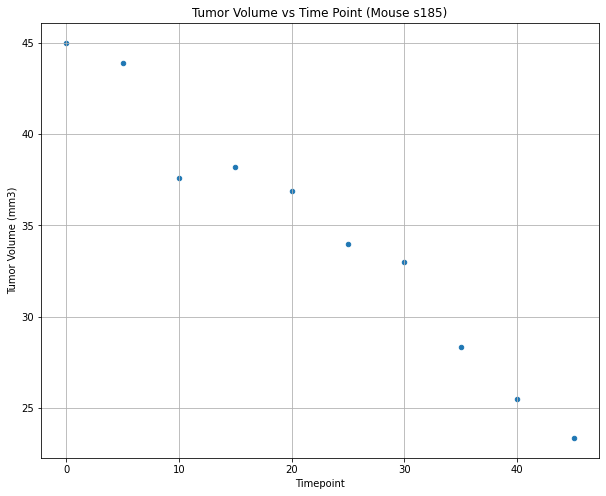

In [44]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

sample_mouse = cleaned_df.loc[(cleaned_df["Drug Regimen"]=="Capomulin") & (cleaned_df["Mouse ID"]=="s185")]

sample_mouse.plot(kind="scatter", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(10,8), 
                  title="Tumor Volume vs Time Point (Mouse s185)")
plt.show()

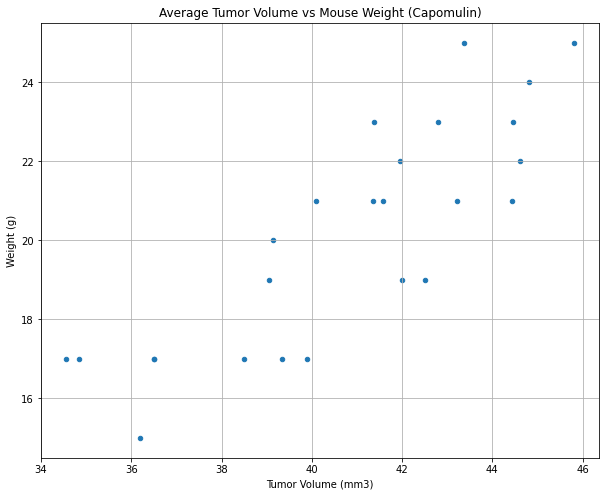

In [45]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

grouped_avg = cleaned_df.loc[cleaned_df['Drug Regimen'] == "Capomulin"].groupby("Mouse ID").mean()

grouped_avg.plot(kind="scatter", x="Tumor Volume (mm3)", y="Weight (g)", grid=True, figsize=(10,8), 
                  title="Average Tumor Volume vs Mouse Weight (Capomulin)")
plt.show()

## Correlation and Regression

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_data = grouped_avg["Tumor Volume (mm3)"]
y_data = grouped_avg["Weight (g)"]
correlation = st.pearsonr(x_data,y_data)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


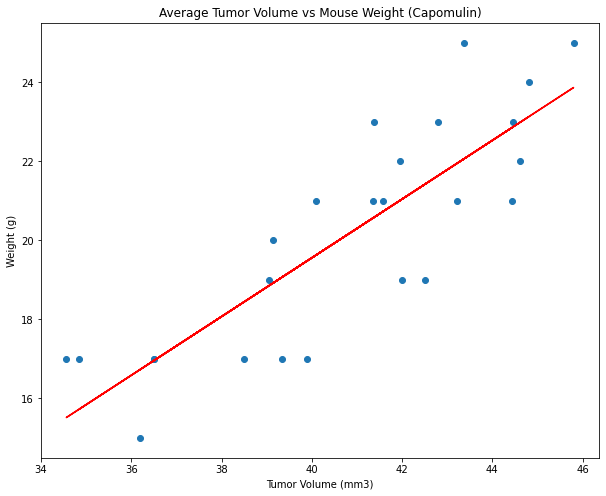

In [47]:
#Linear regression model:
sc, ax1 = plt.subplots(figsize=(10, 8))
x_data = grouped_avg["Tumor Volume (mm3)"]
y_data = grouped_avg["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_data,y_data)
plt.plot(x_data,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title("Average Tumor Volume vs Mouse Weight (Capomulin)")
plt.show()

## Observations

In [48]:
summary_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
quartiles_iqr_data

,Lower Quartile,Median,Upper Quartile,IQR,Lower Bound,Upper Bound
Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015
Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811
Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458
